# TMD A2B for all eta

In [70]:
!pip install -U pysr
!pip install plotly

Julia and Julia dependencies are installed at first import:

In [72]:
import pysr

Now, let's import everything else as well as the PySRRegressor:


In [74]:
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split
import h5py

# PySR for A2B for eta:


In [76]:

file_path = "/Users/hariprashadravikumar/sivers_TMD_PhD_project/save_h5_A12B_A2B/eta_bL_bT_A2B_err.h5"
data_list = []
with h5py.File(file_path, "r") as h5_file:
    for eta in range(7, 11):
        dataset_name = f"eta_{eta}_bL_bT_A2B_err"
        data_list.append(np.array(h5_file[dataset_name]))
        
data_for_eta = np.vstack(data_list)
    
# Extract bLbT and A12B
etabLbT = data_for_eta[:, 0:3]  
A2B = data_for_eta[:, 3]   
A2Berr = data_for_eta[:, 4]
A2Bweight = [1/sigma**2 for sigma in A2Berr]


#print("etabLbT =", etabLbT)
#print("A12B =", A12B)
#print("A12Berr =", A12Berr)

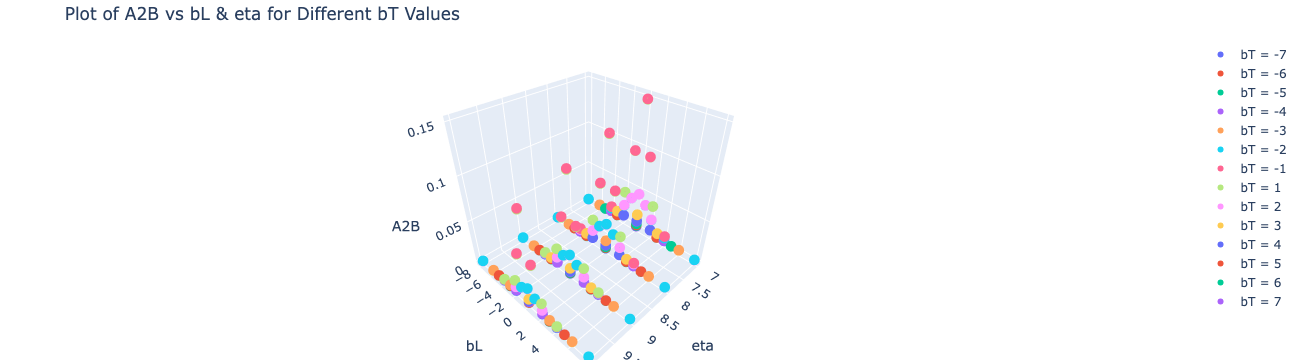

In [77]:
import plotly.graph_objects as go

# Extract unique values for bT
unique_bT = np.unique(etabLbT[:, 2])


fig = go.Figure()
for i, bT in enumerate(unique_bT):
    # Filter data
    mask = etabLbT[:, 2] == bT
    eta_values = etabLbT[mask, 0]
    bL_values = etabLbT[mask, 1]
    A2B_values = A2B[mask]
    A2B_errors = A2Berr[mask]

    # Add trace for each bT
    fig.add_trace(go.Scatter3d(
        x=eta_values , y=bL_values, z=A2B_values,
        mode="markers",
        error_z=dict(type="data", array=A2B_errors, visible=True),
        marker=dict(size=6),
        name=f"bT = {int(bT)}"
    ))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title="eta",
        yaxis_title="bL",
        zaxis_title="A2B",
    ),
    title="Plot of A2B vs bL & eta for Different bT Values",
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show interactive plot
fig.show()


By default, we will set up 30 populations of expressions (which evolve independently except for migrations), use 4 threads, and use `"best"` for our model selection strategy:

In [79]:
default_pysr_params = dict(
    populations=50,
    model_selection="best",
)

In [80]:
# test try functions
x = np.linspace(-10, 10, 1000)
y = 1 / (np.sqrt(1+x**2))

#plt.plot(x, y)
#plt.show()

PySR can run for arbitrarily long, and continue to find more and more accurate expressions. You can set the total number of cycles of evolution with `niterations`, although there are also a [few more ways](https://github.com/MilesCranmer/PySR/pull/134) to stop execution.

**This first execution will take a bit longer to startup, as the library is JIT-compiled. The next execution will be much faster.**

In [82]:
# Learn equations
from sympy import exp, symbols, Function

# Update the PySRRegressor call
model = PySRRegressor(
    niterations=30,
    binary_operators=["*", "Lorentzian(x, y) = 1/(y+x^2)"],
    unary_operators=["expdecay(x) = exp(-x)", "gaussian(x) = exp(-x^2)"],
    extra_sympy_mappings={"expdecay": lambda x: exp(-x), "gaussian": lambda x: exp(-x**2), "Lorentzian": lambda x, y: 1/(y+x**2)},
    constraints={'^': (-1, 1)}
)
model.fit(etabLbT, A2B, weights = A2Bweight, variable_names = ['n','bL', 'bT']) 

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pysr/sr.py:2766: UserWarning:

Note: it looks like you are running in Jupyter. The progress bar will be turned off.

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.140e+05
Progress: 663 / 930 total iterations (71.290%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.125e-04  1.594e+01  y = 0.0046982
3           1.111e-04  6.033e-03  y = Lorentzian(n, 125.54)
4           9.426e-05  1.648e-01  y = gaussian(bT) * 0.052875
5           8.359e-05  1.201e-01  y = Lorentzian(bT * n, -16.312)
6           5.963e-05  3.378e-01  y = gaussian(bT) * Lorentzian(bL, n)
7           5.614e-05  6.025e-02  y = Lorentzian(bL, expdecay(-1.6876)) * gaussian(bT)
9           2.284e-05  4.498e-01  y = Lorentzian(bL, 1.1612) * Lorentzian(bT * 2.4934, bT)
10          9.810e-06  8.450e-01  y = Lorentzian(bT * (n * 0.37537), Lorentzian(-0.055029, g...
                                      aussian(bL)))
11          7.891e-06  2.176e-0

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                        0.004698216   
	1         0.012706                          Lorentzian(bL, 172.04391)   
	2         0.151437                         gaussian(bT) * 0.052874845   
	3         0.120060                       Lorentzian(bT * n, -16.3123)   
	4         0.337826                   gaussian(bT) * Lorentzian(bL, n)   
	5         0.060253  Lorentzian(bL, expdecay(-1.6875976)) * gaussia...   
	6         0.676970  Lorentzian(bT * 2.4934187, 1.3924353) * Lorent...   
	7         0.390565  Lorentzian(bT * (n * 0.37536636), Lorentzian(-...   
	8         0.476910  Lorentzian(bL, 1.2342521) * Lorentzian((n * bT...   
	9         0.012424  Lorentzian(bL, 1.2619832) * Lorentzian((n * bT...   
	10        0.030942  Lorentzian(bL, 1.347129) * Lorentzian((n * bT)...   
	11        0.044437  Lorentzian((n * bT) * 0.38574204, Lorentzian(L...   
	12        0.002453  Lorentzian((n * 0.38686177) * bT, Lorentzian(L...   
	13  >>>>  0.251918  Lorentzian((bT * n) * 0.3658383, Lorentzian(Lo...   
	14        0.019468  Lorentzian((bT * 0.3650379) * n, Lorentzian(Lo...   
	15        0.065535  Lorentzian((bT * 0.3650379) * n, Lorentzian(Lo...   
	16        0.054555  Lorentzian((bT * n) * 0.35346365, Lorentzian(L...   
	17        0.000693  Lorentzian((bT * n) * 0.35456473, Lorentzian(L...   
	18        0.003040  Lorentzian((n * 0.35410115) * bT, Lorentzian(L...   
	
	        loss  complexity  
	0   0.000112           1  
	1   0.000110           3  
	2   0.000094           4  
	3   0.000084           5  
	4   0.000060           6  
	5   0.000056           7  
	6   0.000014           9  
	7   0.000010          10  
	8   0.000006          11  
	9   0.000006          13  
	10  0.000006          14  
	11  0.000005          16  
	12  0.000005          17  
	13  0.000004          18  
	14  0.000004          19  
	15  0.000004          20  
	16  0.000003          22  
	17  0.000003          23  
	18  0.000003          24  
]

  - outputs/20250130_144144_uqraTh/hall_of_fame.csv


We can print the model, which will print out all the discovered expressions:

We can also view the SymPy format of the best expression:

In [85]:
model.sympy()

1/(0.13383766174689*bT**2*n**2 + 1/(exp(-bL**2)*0.4482111 + (n*bL*0.4432122 + 0.000351914863247236)**(-2)))

We can also view the SymPy of any other expression in the list, using the index of it in `model.equations_`.

In [91]:
model.equations_[["complexity", "loss", "equation"]]

,complexity,loss,equation
0,1,0.000112,0.004698216
1,3,0.000110,"Lorentzian(bL, 172.04391)"
2,4,0.000094,gaussian(bT) * 0.052874845
3,5,0.000084,"Lorentzian(bT * n, -16.3123)"
4,6,0.000060,"gaussian(bT) * Lorentzian(bL, n)"
5,7,0.000056,"Lorentzian(bL, expdecay(-1.6875976)) * gaussia..."
6,9,0.000014,"Lorentzian(bT * 2.4934187, 1.3924353) * Lorent..."
7,10,0.000010,"Lorentzian(bT * (n * 0.37536636), Lorentzian(-..."
8,11,0.000006,"Lorentzian(bL, 1.2342521) * Lorentzian((n * bT..."
9,13,0.000006,"Lorentzian(bL, 1.2619832) * Lorentzian((n * bT..."
